# **FASHION - MNIST**
For this coursework, I decided to develop lab exercise 5. The exercise includes using the Fashion MNIST dataset imported from the keras datasets and creating the best model for this type of dataset. The Fashion MNIST dataset is a multiclass image classification task. The dataset includes 60,000 train sets and 10,000 test sets of images of clothes divided into 10 categories. The exercise includes predicting in which category the object in the image belongs.

The technique that I would like to use here to improve the accuracy of the prediction is the Convolutional Neural Network (ConvNet) which is used most often when you have the images as a dataset. For this exercise, I followed chapter 5 of the book "Deep Learning With Python" and the codes that we can find in 2.1 in the master notebook and from [here](https://colab.research.google.com/github/margaretmz/deep-learning/blob/master/fashion_mnist_keras.ipynb#scrollTo=1ShU787gZZg0).

I created two models: one just using Dense layers and another one with ConvNet so we can see the difference.

# Importing libraries
First of all, we need to import the libraries and those are:
* Tensorflow that helps me build and train my models.
* Keras that helps me build my deep learning model together with Tensorflow.
* Matplotlib which I will use to make graphs to represent my results.

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras import models

# Import and load the dataset
Importing and loading the dataset fashion MNIST from keras.

In [0]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print("x_train shape:", train_images.shape, "y_train shape:", train_labels.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


# Visualise the data
The code below is taken from [here](https://colab.research.google.com/github/margaretmz/deep-learning/blob/master/fashion_mnist_keras.ipynb#scrollTo=Ixyte299ZZgk). Here we can see the categories of the clothing and how the data is. The shape of the data is (60000, 28, 28) that means 60000 images with size of 28x28. The image is in greyscale.grey scale.

x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set
y = 2 Pullover


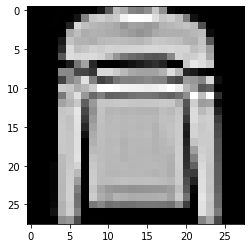

In [0]:
# Print training set shape - note there are 60,000 training data of image size of 28x28, 60,000 train labels)
print("x_train shape:", train_images.shape, "y_train shape:", train_labels.shape)

# Print the number of training and test datasets
print(train_images.shape[0], 'train set')
print(test_images.shape[0], 'test set')

# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

# Image index, you can pick any number between 0 and 59,999
img_index = 5
# y_train contains the lables, ranging from 0 to 9
label_index = train_labels[img_index]
# Print the label, for example 2 Pullover
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
# # Show one of the images from the training dataset
plt.imshow(train_images[img_index], cmap = 'gray')

# Simple model
This is the first model created with only two Dense layers. The last layer is a "softmax" layer and is used mostly for the final output on multi-class classification. Softmax calculate the probabilities for each class, which in our case we have 10 different type of clothing, so 10 class. With the probabilities' value will determine which one of the class will be.

In [0]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


We reshaping the data into a float32 array of shape (60000, 28 * 28) with values between 0 and 1.

In [0]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

Keeping 55000 data for training and the rest 5000 for the validation set.

In [0]:
(train_images, valid_images) = train_images[5000:], train_images[:5000] 
(train_labels, valid_labels) = train_labels[5000:], train_labels[:5000]

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Training the model
After giving the compile arguments we are ready to train our model. I am training with 100 epochs in batch size of 64. Each epoch takes 2 seconds to complete that means the training is really fast. I am using also the callbacks to save the best validation accuracy.


In [0]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)

histories = model.fit(train_images,
                    train_labels,
                    epochs=100,
                    batch_size=64,
                    validation_data=(valid_images, valid_labels),
                    callbacks=[checkpointer])

Train on 55000 samples, validate on 5000 samples
Epoch 1/100
53696/55000 [============================>.] - ETA: 0s - loss: 0.5668 - acc: 0.8038
Epoch 00001: val_loss improved from inf to 0.42910, saving model to model.weights.best.hdf5
55000/55000 [==============================] - 2s 36us/sample - loss: 0.5645 - acc: 0.8045 - val_loss: 0.4291 - val_acc: 0.8536
Epoch 2/100
54976/55000 [============================>.] - ETA: 0s - loss: 0.4154 - acc: 0.8525
Epoch 00002: val_loss improved from 0.42910 to 0.38191, saving model to model.weights.best.hdf5
55000/55000 [==============================] - 2s 34us/sample - loss: 0.4155 - acc: 0.8524 - val_loss: 0.3819 - val_acc: 0.8642
Epoch 3/100
53888/55000 [============================>.] - ETA: 0s - loss: 0.3799 - acc: 0.8643
Epoch 00003: val_loss did not improve from 0.38191
55000/55000 [==============================] - 2s 33us/sample - loss: 0.3800 - acc: 0.8643 - val_loss: 0.3834 - val_acc: 0.8654
Epoch 4/100
53312/55000 [===============

We are loading the best validation accuracy of the 100 epochs

In [0]:
# Load the weights with the best validation accuracy
model.load_weights('model.weights.best.hdf5')

This model have an accuracy of around 88% that is not bad but we can do better.



In [0]:
# Evaluate the model on test set
score = model.evaluate(test_images, test_labels, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.8809


In the graph below we can see that the accuracy when the model was training is more than 96% but with data never seen is going up and down around 88%. It's called "overfitting" when we see a gap like this between train accuracy and test accuracy. To resolve the overfitting the best solution is having more testing data. We can see also that we can use 10 epochs and getting the same results.

I took the graph code from [here](https://stackoverflow.com/questions/41908379/keras-plot-training-validation-and-test-set-accuracy).

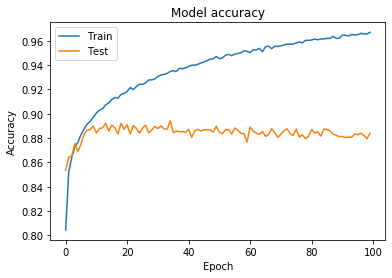

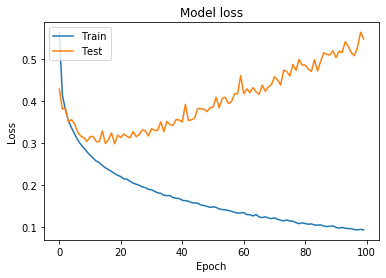

In [0]:
# Plot training & validation accuracy values
plt.plot(histories.history['acc'])
plt.plot(histories.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(histories.history['loss'])
plt.plot(histories.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# The model with ConvNet
For the new model, I am using Conv2D, Pooling and Dropout.

Conv2D is used mostly for image recognition. In our case, it takes the image and pass a filter over the image in some specific pixels of the image and give some value (0-1) and then move in another part of the image and continue this process until all the image is scanned. My kernel size is 2 so that means the output of the image will be a 2x2 size.

Pooling function is to progressively reduce the spatial size of the representation to reduce the amount of parameters and computation in the network. Pooling layer operates on each feature map independently. Source: [medium.com](https://medium.com/technologymadeeasy/the-best-explanation-of-convolutional-neural-networks-on-the-internet-fbb8b1ad5df8)

Dropout function reduce the overfitting. It drops out visible and hidden layers.

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Dropout(0.3))

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
Total params: 8,544
Trainable params: 8,5

I have to flatten the 3D outputs into 1D and adding the Dense layers. I have used "softmax" again for the output layer. We can see how our networks are. From `(None, 7, 7, 32)` is flattened to `(None, 1568)`.

In [0]:
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0

Here, I am keeping 55000 data for training and the rest 5000 for the validation set. Reshaping the data into `(train_images.shape[0], 28, 28, 1)`. The one 1 means that the image is in greyscale.

In [0]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(train_images, valid_images) = train_images[5000:], train_images[:5000] 
(train_labels, valid_labels) = train_labels[5000:], train_labels[:5000]

train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
valid_images = valid_images.reshape((valid_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# One-hot encode the labels
train_labels = to_categorical(train_labels, 10)
valid_labels = to_categorical(valid_labels, 10)
test_labels = to_categorical(test_labels, 10)

print("train_images shape:", train_images.shape, "train_labels shape:", train_labels.shape)

# Print the number of training, validation, and test datasets
print(train_images.shape[0], 'train set')
print(valid_images.shape[0], 'validation set')
print(test_images.shape[0], 'test set')

train_images shape: (55000, 28, 28, 1) train_labels shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


In [0]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255
print("x_train shape:", train_images.shape, "y_train shape:", train_labels.shape)

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)


Configuration of the learning process.

In [0]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Training the model
Also here, I am using the callback to save the best validation accuracy but in this case, the epochs are just 10 because the network is bigger than the previous model and it take more than 1 minute to complete an epoch.

In [0]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)

history = model.fit(train_images,
                    train_labels,
                    epochs=10,
                    batch_size=64,
                    validation_data=(valid_images, valid_labels),
                    callbacks=[checkpointer])

Using TensorFlow backend.


Train on 55000 samples, validate on 5000 samples
Epoch 1/10
54976/55000 [============================>.] - ETA: 0s - loss: 0.5943 - acc: 0.7806
Epoch 00001: val_loss improved from inf to 35.75364, saving model to model.weights.best.hdf5
55000/55000 [==============================] - 67s 1ms/sample - loss: 0.5942 - acc: 0.7806 - val_loss: 35.7536 - val_acc: 0.8674
Epoch 2/10
54976/55000 [============================>.] - ETA: 0s - loss: 0.4067 - acc: 0.8525
Epoch 00002: val_loss improved from 35.75364 to 32.59213, saving model to model.weights.best.hdf5
55000/55000 [==============================] - 66s 1ms/sample - loss: 0.4067 - acc: 0.8525 - val_loss: 32.5921 - val_acc: 0.8820
Epoch 3/10
54976/55000 [============================>.] - ETA: 0s - loss: 0.3647 - acc: 0.8671
Epoch 00003: val_loss improved from 32.59213 to 30.02967, saving model to model.weights.best.hdf5
55000/55000 [==============================] - 66s 1ms/sample - loss: 0.3647 - acc: 0.8672 - val_loss: 30.0297 - val_ac

# Test accuracy


In [0]:
# Load the weights with the best validation accuracy
model.load_weights('model.weights.best.hdf5')

The accuracy is around 90% that is better than the previous model accuracy.

In [0]:
# Evaluate the model on test set
score = model.evaluate(test_images, test_labels, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9038


The difference from test and train accuracy gap is lower than the previous model.

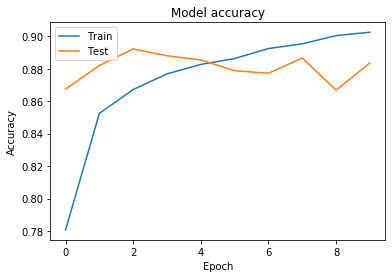

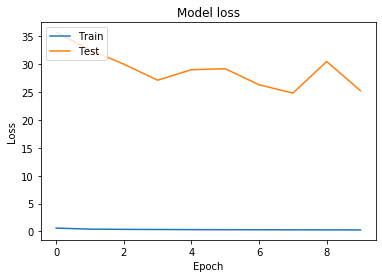

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Predictions
We can see a simple visualisation of the prediction of this model. The image with red text above are the wrong predictions and you can see the correct answer inside the parenthesis.


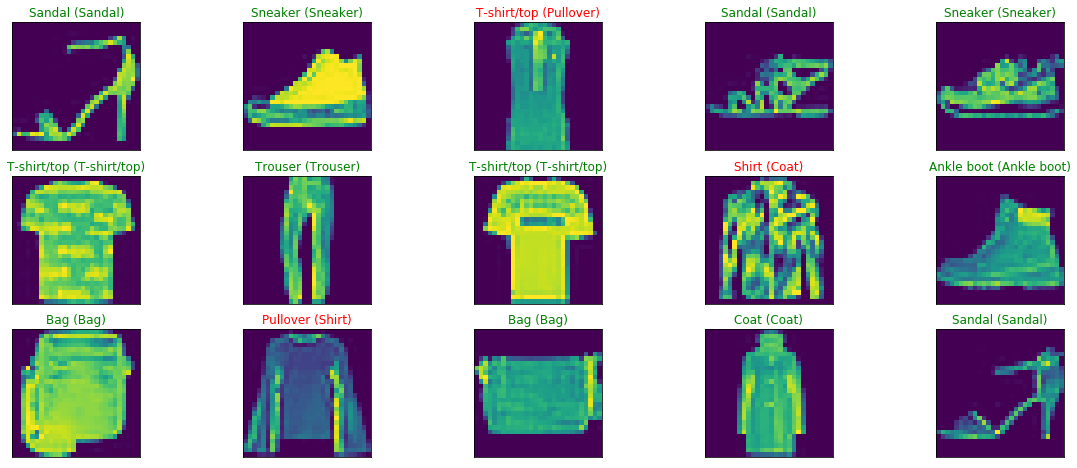

In [0]:
y_hat = model.predict(test_images)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(test_images.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_images[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(test_labels[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

# Conclusion
I have done two different models, one with one the dense layer and the other also with convolutional layers to see the difference. We can see that the first model is faster than the second one. But the second model has a higher accuracy. The accuracy is increased by 2% and it is thanks to the ConvNet layers that are really good with images dataset. I have tried with different parameters for both model but the first model never increased his accuracy.